In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from ggplot import *

/home/shreeranga/PP/Exp/venvs/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/shreeranga/PP/Exp/venvs/lib/python2.7/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/shreeranga/PP/Exp/venvs/lib/python2.7/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/home/shreeranga/PP/Exp/venvs/lib

In [2]:
# load the iris data set
df = pd.read_csv("iris.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


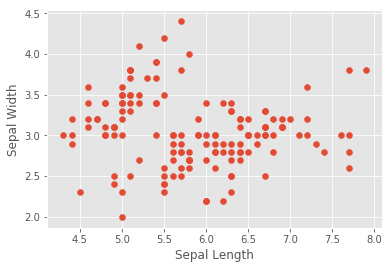

In [4]:
plt.scatter(df['sepal_length'], df['sepal_width'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

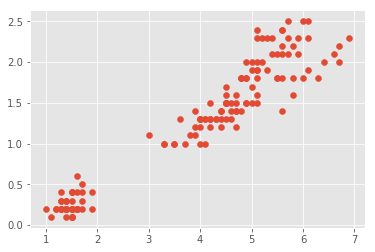

In [5]:
plt.scatter(df['petal_length'], df['petal_width'])

In [6]:
X = df
y = X.pop('species')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(accuracy_score(y_test, pred))

0.98


In [9]:
# hyper-parameter 'k' tuning with cross-validation

# create odd list of k's for knn
neighbors = list(range(1,50,2))

# perform 10 fold cross-validation
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(score.mean())

In [10]:
# determining the best k
optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print "The optimal number of neighbors is %d" % optimal_k

The optimal number of neighbors is 7


In [11]:
# Todo
# I suck at plotting. Gotta work on that. 
# Different colors for different species.